# Tarea 01 **Pandas y gráficas**

#### Informe Estadístico: Análisis de Servicios de Taxi en Enero

A continuación, se presentan los principales hallazgos y visualizaciones del análisis realizado:

 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

 2. Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

 3. Qué tipo de taxi recibe más propinas en promedio

 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi

 5. Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

 6. Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [7]:
yellow = pd.read_parquet('yellow_tripdata_2025-01.parquet')
green = pd.read_parquet('green_tripdata_2025-01.parquet')
fhvhv = pd.read_parquet('fhvhv_tripdata_2025-01.parquet')
fhv=pd.read_parquet('fhv_tripdata_2025-01.parquet')

yellowTotal = yellow['total_amount'].mean()
greenTotal = green['total_amount'].mean()
fhvhvTotal = fhvhv['driver_pay'].mean()
totalTaxis = (yellowTotal + greenTotal + fhvhvTotal)/3

print(f"Promedio de ingresos brutos para taxi amarillo: ${yellowTotal:.2f}")
print(f"Promedio de ingresos brutos para taxi verde: ${greenTotal:.2f}")
print(f"Promedio de ingresos brutos para taxi FHVHV: ${fhvhvTotal:.2f}")
print(f"Promedio de ingresos brutos de todos los taxis: ${totalTaxis:.2f}")

Promedio de ingresos brutos para taxi amarillo: $25.61
Promedio de ingresos brutos para taxi verde: $22.63
Promedio de ingresos brutos para taxi FHVHV: $18.65
Promedio de ingresos brutos de todos los taxis: $22.30


### Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [8]:
yellowDistance = yellow['trip_distance'].mean()
greenDistance = green['trip_distance'].mean()
fhvhvDistance = fhvhv['trip_miles'].mean()

print(f"Distancia promedio recorrida por taxi amarillo: {yellowDistance:.2f} millas")
print(f"Distancia promedio recorrida por taxi verde: {greenDistance:.2f} millas")
print(f"Distancia promedio recorrida por taxi FHVHV: {fhvhvDistance:.2f} millas")

Distancia promedio recorrida por taxi amarillo: 5.86 millas
Distancia promedio recorrida por taxi verde: 21.53 millas
Distancia promedio recorrida por taxi FHVHV: 4.85 millas


### Qué tipo de taxi recibe más propinas en promedio

In [10]:
yellowTip = yellow['tip_amount'].mean()
greenTip = green['tip_amount'].mean()
fhvhvTip = fhvhv['tips'].mean()
print(f"Propinas promedio para taxi amarillo: ${yellowTip:.2f}")
print(f"Propinas promedio para taxi verde: ${greenTip:.2f}")
print(f"Propinas promedio para taxi FHVHV: ${fhvhvTip:.2f}")

Propinas promedio para taxi amarillo: $2.96
Propinas promedio para taxi verde: $2.48
Propinas promedio para taxi FHVHV: $1.04


### Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi

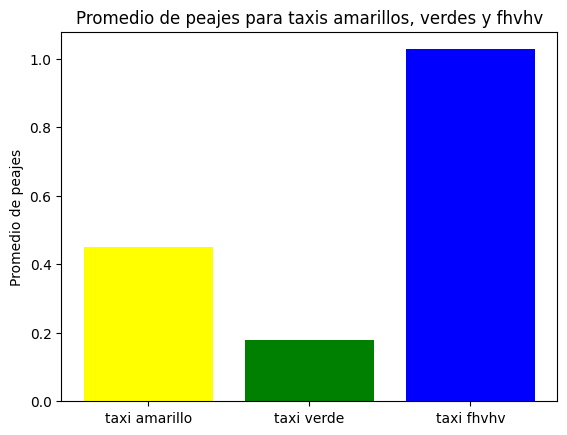

In [6]:
yellowToll = yellow['tolls_amount'].mean()
greenToll = green['tolls_amount'].mean()
fhvhvToll = fhvhv['tolls'].mean()

plt.bar(['taxi amarillo', 'taxi verde', "taxi fhvhv"], [yellowToll, greenToll, fhvhvToll], color=['yellow', 'green', 'blue'])
plt.ylabel('Promedio de peajes')
plt.title('Promedio de peajes para taxis amarillos, verdes y fhvhv')
plt.show()

### Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

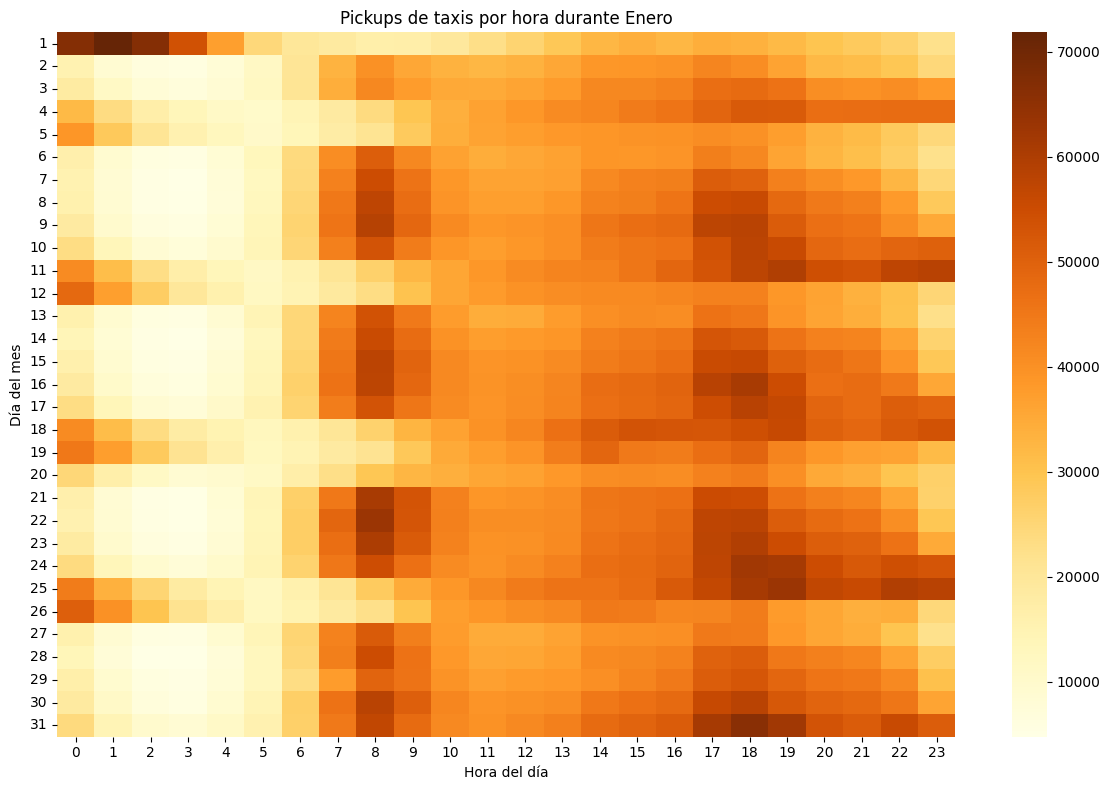

In [8]:
#Procesar datos de taxis amarillos (yellow)
yellow['day'] = yellow['tpep_pickup_datetime'].dt.day
yellow['hour'] = yellow['tpep_pickup_datetime'].dt.hour
yellow_counts = yellow.groupby(['day', 'hour']).size().unstack()

fhvhv['day']= fhvhv['pickup_datetime'].dt.day
fhvhv['hour']= fhvhv['pickup_datetime'].dt.hour
fhvhv_counts = fhvhv.groupby(['day', 'hour']).size().unstack()

fhv['day']= fhv['pickup_datetime'].dt.day
fhv['hour']= fhv['pickup_datetime'].dt.hour
fhv_counts = fhv.groupby(['day', 'hour']).size().unstack()

#Procesar datos de taxis verdes (green)
green['day'] = green['lpep_pickup_datetime'].dt.day
green['hour'] = green['lpep_pickup_datetime'].dt.hour
green_counts = green.groupby(['day', 'hour']).size().unstack()

#Combinar ambos conjuntos de datos (opcional)
total_counts = yellow_counts.add(green_counts, fill_value=0).add(fhvhv_counts, fill_value=0).add(fhv_counts, fill_value=0)

#Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(total_counts, cmap='YlOrBr', annot=False)

#Personalizar el gráfico
plt.title('Pickups de taxis por hora durante Enero')
plt.xlabel('Hora del día')
plt.ylabel('Día del mes')
plt.yticks(rotation=0)  # Para que los días se vean horizontales

plt.tight_layout()
plt.show()

### Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

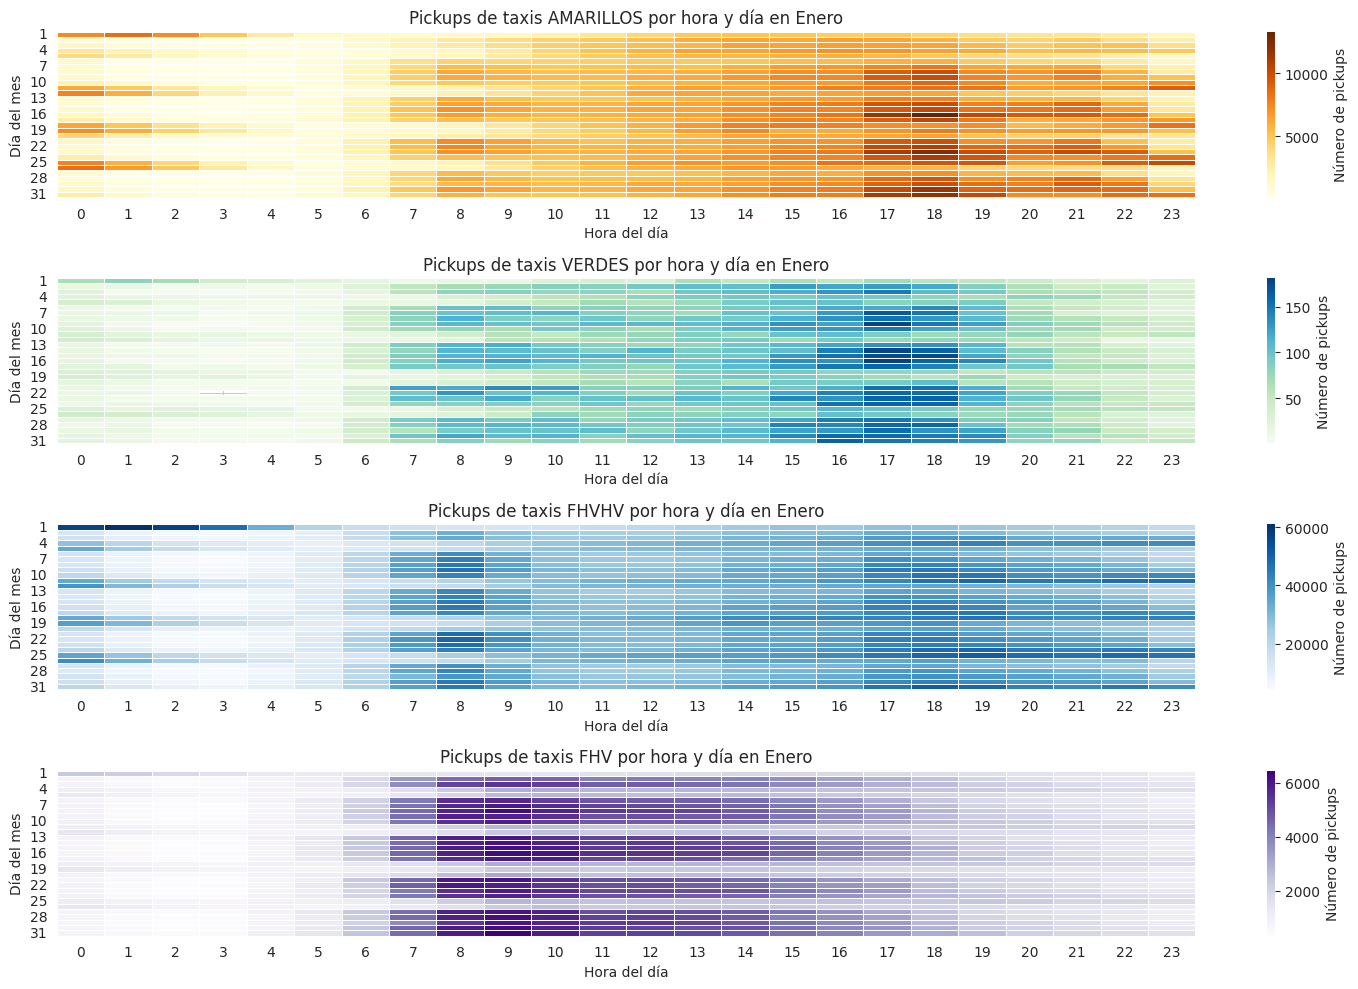

In [9]:
yellow['day'] = yellow['tpep_pickup_datetime'].dt.day
yellow['hour'] = yellow['tpep_pickup_datetime'].dt.hour

# Extraer día y hora para taxis verdes
green['day'] = green['lpep_pickup_datetime'].dt.day
green['hour'] = green['lpep_pickup_datetime'].dt.hour

fhvhv['day'] = fhvhv['pickup_datetime'].dt.day
fhvhv['hour'] = fhvhv['pickup_datetime'].dt.hour

fhv['day'] = fhv['pickup_datetime'].dt.day
fhv['hour'] = fhv['pickup_datetime'].dt.hour

# Agrupar por día y hora (formato matriz para heatmap)
yellow_counts = yellow.groupby(['day', 'hour']).size().unstack()
green_counts = green.groupby(['day', 'hour']).size().unstack()
fhvhv_counts = fhvhv.groupby(['day', 'hour']).size().unstack()
fhv_counts = fhv.groupby(['day', 'hour']).size().unstack()

# Configurar estilo y tamaño de los gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Heatmap para taxis AMARILLOS 
plt.subplot(4, 1, 1)  # 4 filas, 1 columna, posición 1
sns.heatmap(
    yellow_counts,
    cmap="YlOrBr",  # Amarillo-Naranja 
    annot=False,     
    fmt=".0f",      
    linewidths=0.5,  
    cbar_kws={'label': 'Número de pickups'}
)
plt.title("Pickups de taxis AMARILLOS por hora y día en Enero")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.yticks(rotation=0)  # Días en horizontal

# Heatmap para taxis VERDES
plt.subplot(4, 1, 2)  # 2 filas, 1 columna, posición 2
sns.heatmap(
    green_counts,
    cmap="GnBu",      # Verde-Azul 
    annot=False,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'label': 'Número de pickups'}
)
plt.title("Pickups de taxis VERDES por hora y día en Enero")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.yticks(rotation=0)

# Heatmap para taxis FHVHV
plt.subplot(4, 1, 3)  # 3 filas, 1 columna, posición 3
sns.heatmap(
    fhvhv_counts,
    cmap="Blues",     # Azul 
    annot=False,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'label': 'Número de pickups'}
)
plt.title("Pickups de taxis FHVHV por hora y día en Enero")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.yticks(rotation=0)
# Heatmap para taxis FHV
plt.subplot(4, 1, 4)  # 4 filas, 1 columna, posición 4
sns.heatmap(
    fhv_counts,
    cmap="Purples",   # Morado 
    annot=False,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'label': 'Número de pickups'}
)
plt.title("Pickups de taxis FHV por hora y día en Enero")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.yticks(rotation=0)

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()

In [66]:
fhv = pd.read_parquet('fhv_tripdata_2025-01.parquet')
print(fhv.columns)

fhvhv = pd.read_parquet('fhvhv_tripdata_2025-01.parquet')
print(fhvhv.columns)

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')
Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'cbd_congestion_fee'],
      dtype='object')
